In [601]:
#importing necessary libraries

import sys
import os
import warnings
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score
import pandas as pd

warnings.filterwarnings('ignore')

# Reading Data and Basic Checks

In [602]:
df = pd.read_csv('train.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [603]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [604]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [605]:
df.shape

(1460, 81)

## Null Value Check

In [606]:
df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [607]:
# seeing how many columns have null values
df.columns[df.isna().any()].tolist()

['LotFrontage',
 'Alley',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

In [608]:
# percentage of null values

round(df.isnull().sum() / len(df.index) , 2 ).sort_values(ascending = False).head(25)

PoolQC          1.00
MiscFeature     0.96
Alley           0.94
Fence           0.81
FireplaceQu     0.47
LotFrontage     0.18
GarageType      0.06
GarageCond      0.06
GarageYrBlt     0.06
GarageFinish    0.06
GarageQual      0.06
BsmtFinType1    0.03
BsmtExposure    0.03
BsmtCond        0.03
BsmtQual        0.03
BsmtFinType2    0.03
MasVnrArea      0.01
MasVnrType      0.01
Exterior2nd     0.00
Exterior1st     0.00
OverallCond     0.00
ExterQual       0.00
ExterCond       0.00
Foundation      0.00
RoofMatl        0.00
dtype: float64

## Checking for columns with only 1 value

In [609]:
# number of columns with only 1 unique value
#since this will not affect our prediction analysis

df.nunique()

Id               1460
MSSubClass         15
MSZoning            5
LotFrontage       110
LotArea          1073
                 ... 
MoSold             12
YrSold              5
SaleType            9
SaleCondition       6
SalePrice         663
Length: 81, dtype: int64

In [610]:
df.PoolQC.value_counts()

Gd    3
Fa    2
Ex    2
Name: PoolQC, dtype: int64

In [611]:
df.Alley.value_counts()

Grvl    50
Pave    41
Name: Alley, dtype: int64

In [612]:
df.Street.value_counts()

Pave    1454
Grvl       6
Name: Street, dtype: int64

In [613]:
df.Utilities.value_counts()

AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64

# Data Prepartion 

## Encoding categorical variables, handling null values

In [614]:
df_missing = pd.DataFrame(round(100*(df.isnull().sum() / len(df.index)),2),columns = ['missing'])
df_missing.sort_values(by = 'missing', ascending = False).head(20)

,missing
PoolQC,99.52
MiscFeature,96.30
Alley,93.77
Fence,80.75
FireplaceQu,47.26
LotFrontage,17.74
GarageYrBlt,5.55
GarageCond,5.55
GarageType,5.55
GarageFinish,5.55


## Treating Null Values

In [615]:
df.PoolQC = df.PoolQC.fillna('No_Pool')
df.MiscFeature = df.MiscFeature.fillna('None')
df.Alley = df.Alley.fillna('No_Alley_Access')
df.Fence = df.Fence.fillna('No_Fence')
df.FireplaceQu = df.FireplaceQu.fillna('No_Fireplace')
df.GarageYrBlt = df.GarageYrBlt.fillna(0)
df.MasVnrType = df.MasVnrType.fillna('None')
df.MasVnrArea = df.MasVnrArea.fillna(0)
df.Electrical = df.Electrical.fillna('Other')

#### dropping LotFrontage as it has a lot of null values

In [616]:
df.drop('LotFrontage', axis = 1, inplace = True)

#### imputing null values with 'no basement data'

In [617]:
for col in('BsmtFinType1', 'BsmtFinType2', 'BsmtExposure', 'BsmtQual', 'BsmtCond'):
    df[col] = df[col].fillna('No_Basement')

#### imputing null values with 'no garage data'

In [618]:
for col in ('GarageCond', 'GarageType', 'GarageFinish', 'GarageQual'):
    df[col] = df[col].fillna('No_Garage')

In [619]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [620]:
df.GarageYrBlt = df.GarageYrBlt.astype('int')

# EDA

## Univariate and Bivariate Analysis

In [621]:
sns.set_theme(style="whitegrid", palette="pastel")

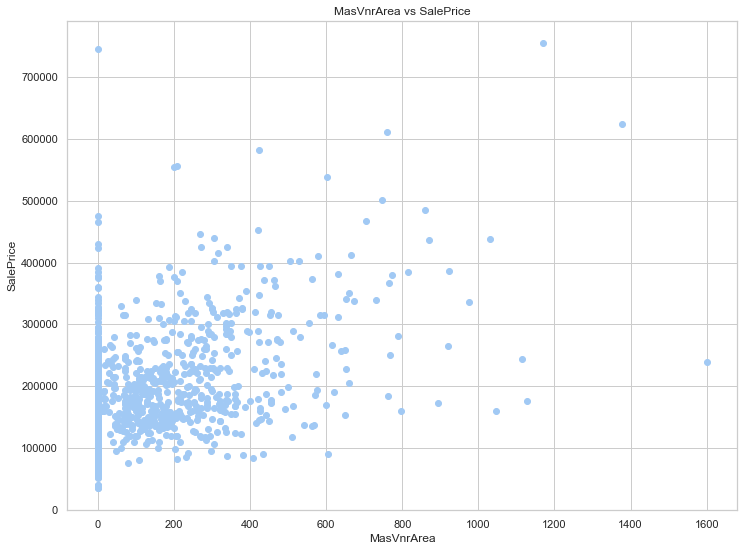

In [622]:
# MasVnrArea vs SalePrice

figure = plt.figure(figsize = (12,9))
plt.scatter(df.MasVnrArea, df.SalePrice)
plt.title('MasVnrArea vs SalePrice')
plt.xlabel('MasVnrArea')
plt.ylabel('SalePrice')
plt.show()

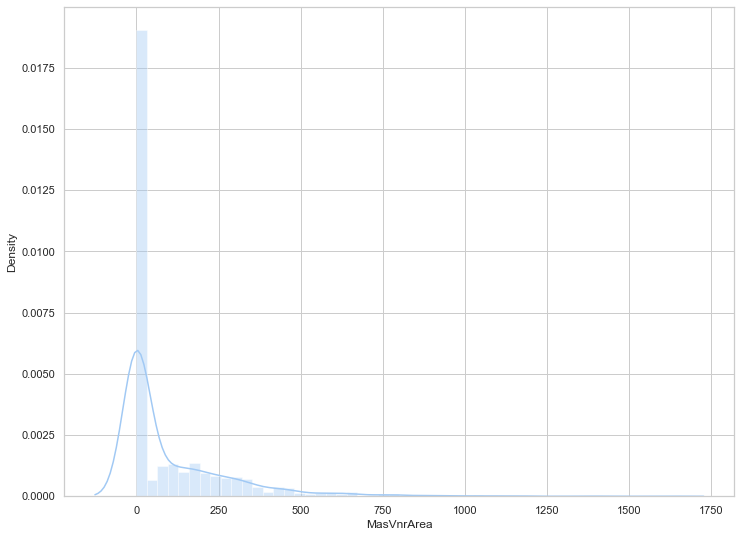

In [623]:
figure = plt.figure(figsize = (12,9))
sns.distplot(df.MasVnrArea)

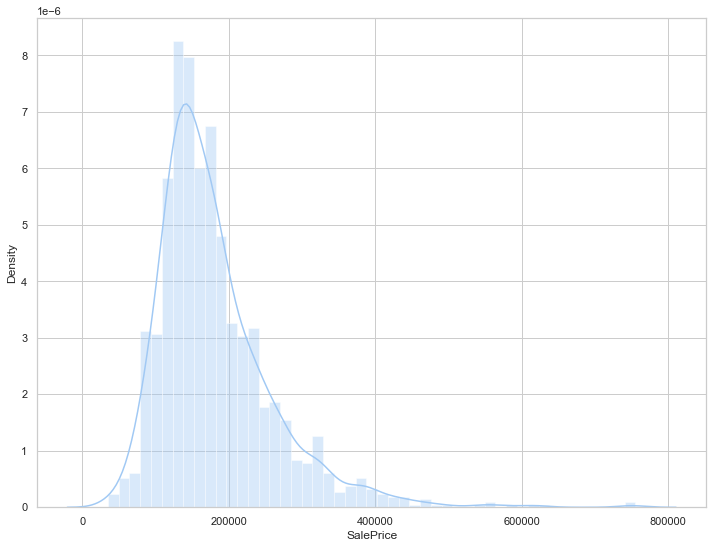

In [624]:
figure = plt.figure(figsize = (12,9))
sns.distplot(df.SalePrice)

In [625]:
print('Skewness: ', df.SalePrice.skew())
print('Kurtosis: ', df.SalePrice.kurt())

Skewness:  1.8828757597682129
Kurtosis:  6.536281860064529


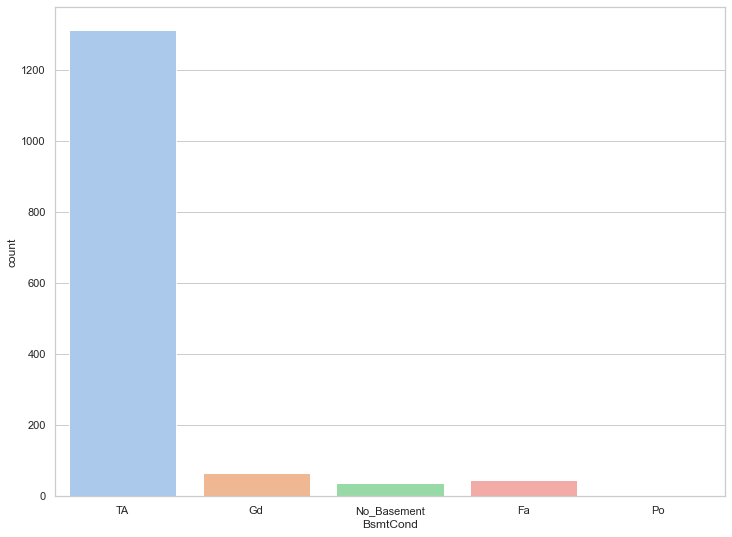

In [626]:
figure = plt.figure(figsize = (12,9))
sns.countplot(x = 'BsmtCond', data = df)
plt.show()

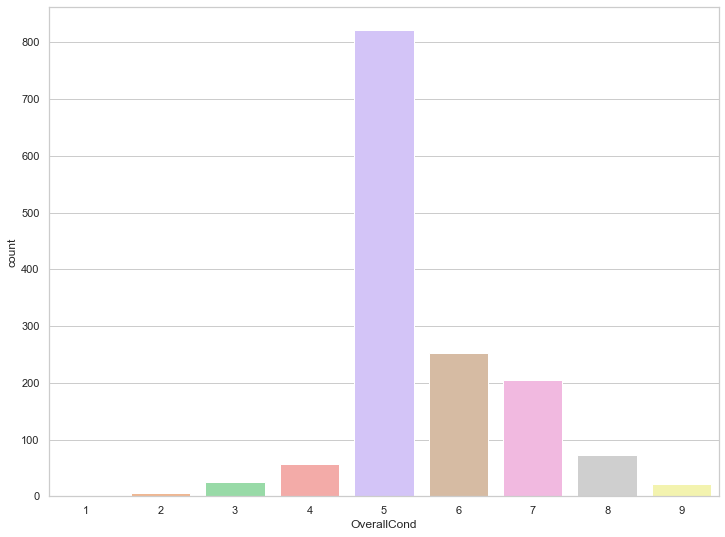

In [627]:
figure = plt.figure(figsize = (12,9))
sns.countplot(x = 'OverallCond', data = df)
plt.show()

<Figure size 864x864 with 0 Axes>

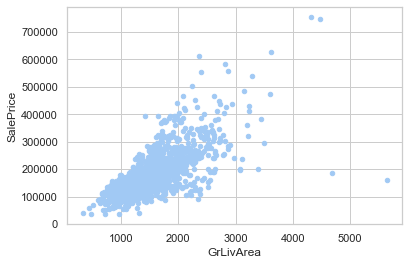

In [628]:
figure = plt.figure(figsize = (12,12))
df.plot.scatter(x = 'GrLivArea', y = 'SalePrice')
plt.show()

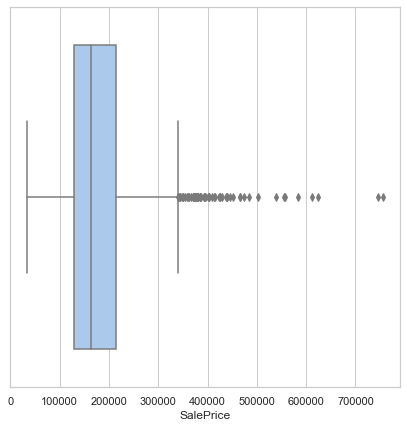

In [629]:
# outliers

figure = plt.figure(figsize = (7,7))
sns.boxplot(x = 'SalePrice', data = df)
plt.show()

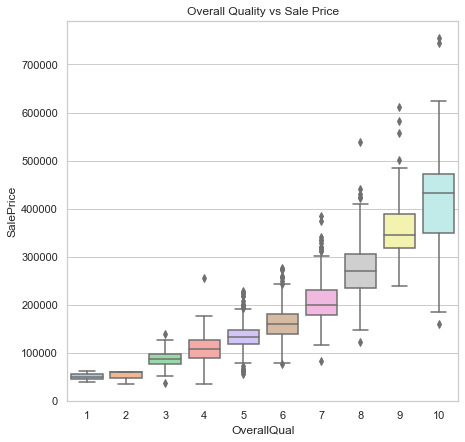

In [630]:
figure = plt.figure(figsize = (7,7))
sns.boxplot(x = 'OverallQual', y = 'SalePrice', data = df)
plt.title('Overall Quality vs Sale Price')
plt.show()

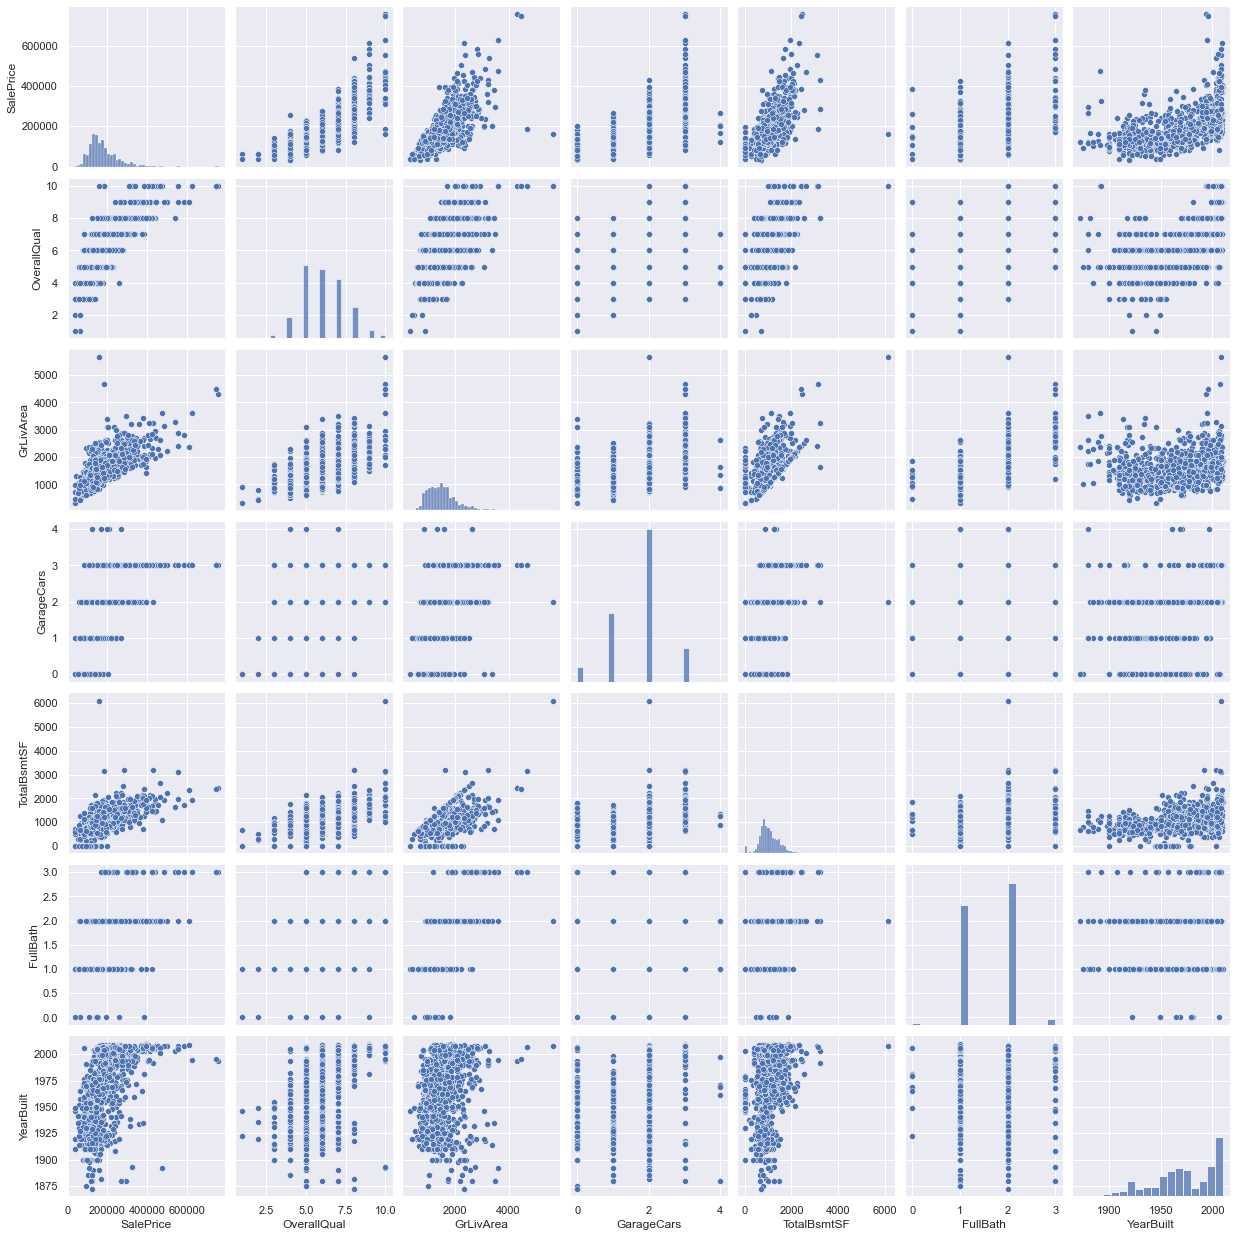

In [631]:
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(df[cols], size = 2.5)
plt.show()

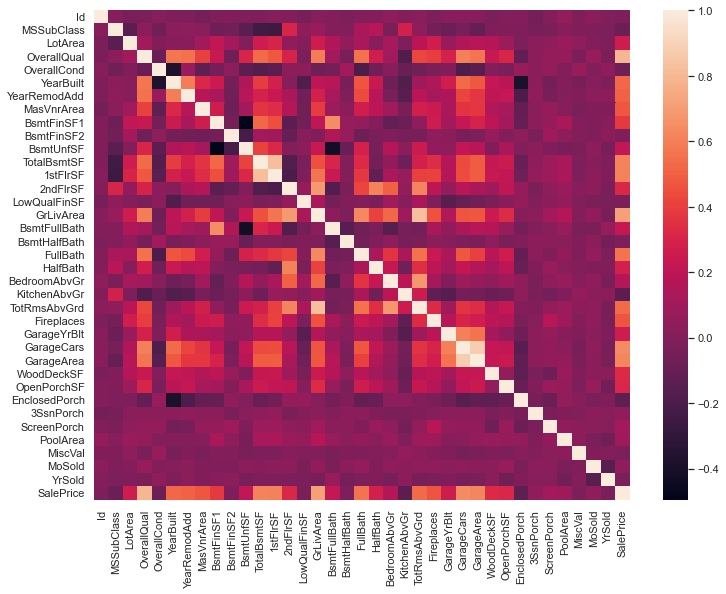

In [632]:
figure = plt.figure(figsize = (12,9))
sns.heatmap(df.corr())
plt.show()

# Data Preparation

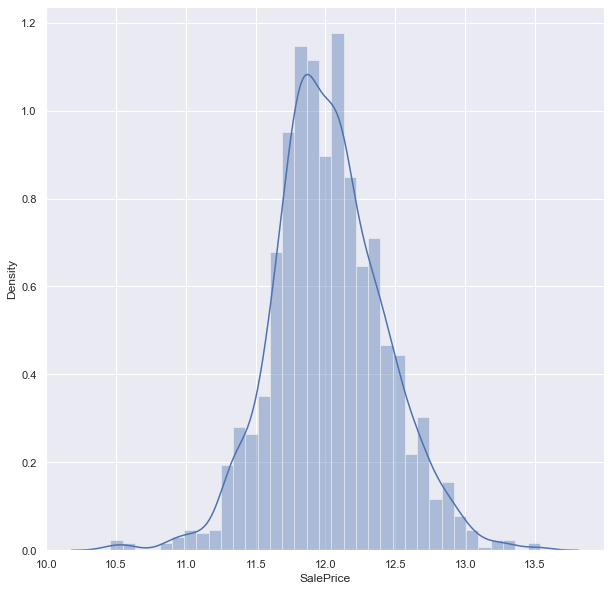

In [633]:
plt.figure(figsize = (10,10))
sns.distplot(np.log(df.SalePrice))
plt.show()

In [634]:
#numeric columns

numeric_data = df.select_dtypes( include = ['float64', 'int64'])
numeric_data.columns

Index(['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [635]:
# encoding binary categorical columns to 0 and 1

df.Street = df['Street'].apply(lambda x : 1 if x == 'Pave' else 0)
df.CentralAir = df['CentralAir'].apply(lambda x : 1 if x == 'Y' else 0)
df.PavedDrive = df['PavedDrive'].apply(lambda x : 1 if x == 'Y' else 0)

In [636]:
df.head()

,Id,MSSubClass,MSZoning,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,1,No_Alley_Access,Reg,Lvl,AllPub,Inside,...,0,No_Pool,No_Fence,None,0,2,2008,WD,Normal,208500
1,2,20,RL,9600,1,No_Alley_Access,Reg,Lvl,AllPub,FR2,...,0,No_Pool,No_Fence,None,0,5,2007,WD,Normal,181500
2,3,60,RL,11250,1,No_Alley_Access,IR1,Lvl,AllPub,Inside,...,0,No_Pool,No_Fence,None,0,9,2008,WD,Normal,223500
3,4,70,RL,9550,1,No_Alley_Access,IR1,Lvl,AllPub,Corner,...,0,No_Pool,No_Fence,None,0,2,2006,WD,Abnorml,140000
4,5,60,RL,14260,1,No_Alley_Access,IR1,Lvl,AllPub,FR2,...,0,No_Pool,No_Fence,None,0,12,2008,WD,Normal,250000


In [637]:
cat_values = df.select_dtypes(include = ['object'])
cat_values.head()

,MSZoning,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,No_Alley_Access,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,No_Fireplace,Attchd,RFn,TA,TA,No_Pool,No_Fence,None,WD,Normal
1,RL,No_Alley_Access,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,TA,Attchd,RFn,TA,TA,No_Pool,No_Fence,None,WD,Normal
2,RL,No_Alley_Access,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,TA,Attchd,RFn,TA,TA,No_Pool,No_Fence,None,WD,Normal
3,RL,No_Alley_Access,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,...,Gd,Detchd,Unf,TA,TA,No_Pool,No_Fence,None,WD,Abnorml
4,RL,No_Alley_Access,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,...,TA,Attchd,RFn,TA,TA,No_Pool,No_Fence,None,WD,Normal


In [638]:
# converting to dummies

data_dummies = pd.get_dummies(cat_values, drop_first = True)
data_dummies.head()

,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Alley_No_Alley_Access,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,1,0,1,0,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
1,0,0,1,0,1,0,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
2,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [639]:
# dropping id col

df.drop('Id', axis = 1, inplace = True)
df.head()

,MSSubClass,MSZoning,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,8450,1,No_Alley_Access,Reg,Lvl,AllPub,Inside,Gtl,...,0,No_Pool,No_Fence,None,0,2,2008,WD,Normal,208500
1,20,RL,9600,1,No_Alley_Access,Reg,Lvl,AllPub,FR2,Gtl,...,0,No_Pool,No_Fence,None,0,5,2007,WD,Normal,181500
2,60,RL,11250,1,No_Alley_Access,IR1,Lvl,AllPub,Inside,Gtl,...,0,No_Pool,No_Fence,None,0,9,2008,WD,Normal,223500
3,70,RL,9550,1,No_Alley_Access,IR1,Lvl,AllPub,Corner,Gtl,...,0,No_Pool,No_Fence,None,0,2,2006,WD,Abnorml,140000
4,60,RL,14260,1,No_Alley_Access,IR1,Lvl,AllPub,FR2,Gtl,...,0,No_Pool,No_Fence,None,0,12,2008,WD,Normal,250000


In [640]:
# dropping the original categorical columns for which we created dummies

df.drop(list(cat_values.columns), axis = 1, inplace = True)

In [641]:
# concatenating the dummy variable dataframe with the original data frame

df = pd.concat([df, data_dummies], axis = 1)

In [642]:
df.shape

(1460, 259)

In [643]:
df.columns

Index(['MSSubClass', 'LotArea', 'Street', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=259)

# Train Test Split

In [644]:
df_train, df_test = train_test_split(df, train_size = 0.7, test_size= 0.3, random_state = 100)

In [645]:
y_train = np.log(df_train.SalePrice)
x_train = df_train.drop('SalePrice', axis = 1)

y_test = np.log(df_test.SalePrice)
x_test = df_test.drop('SalePrice', axis = 1)

In [646]:
num_values = x_train.select_dtypes(include = ['int64', 'float64']).columns
num_values

Index(['MSSubClass', 'LotArea', 'Street', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', 'CentralAir', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageCars', 'GarageArea', 'PavedDrive', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold'],
      dtype='object')

In [647]:
## scaling the data

scaler = StandardScaler()
x_train[num_values] = scaler.fit_transform(x_train[num_values])
x_test[num_values] = scaler.fit_transform(x_test[num_values])

# Model Building

In [648]:
# building a linear regression model

reg = LinearRegression()
reg.fit(x_train, y_train)

LinearRegression()

In [649]:
rfe = RFE(estimator = reg, n_features_to_select = 70)
rfe = rfe.fit(x_train, y_train)

In [650]:
col = x_train.columns[rfe.support_]
col

Index(['OverallQual', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'MSZoning_FV',
       'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM', 'Neighborhood_BrDale',
       'Neighborhood_Crawfor', 'Condition1_PosA', 'Condition2_PosN',
       'Condition2_RRAe', 'BldgType_Duplex', 'RoofStyle_Gable',
       'RoofStyle_Gambrel', 'RoofStyle_Hip', 'RoofStyle_Shed',
       'RoofMatl_CompShg', 'RoofMatl_Membran', 'RoofMatl_Metal',
       'RoofMatl_Roll', 'RoofMatl_Tar&Grv', 'RoofMatl_WdShake',
       'RoofMatl_WdShngl', 'Exterior1st_AsphShn', 'Exterior1st_BrkComm',
       'Exterior1st_CBlock', 'Exterior1st_ImStucc', 'Exterior2nd_AsphShn',
       'Exterior2nd_CBlock', 'Exterior2nd_ImStucc', 'ExterCond_Fa',
       'ExterCond_Gd', 'ExterCond_TA', 'Foundation_Stone',
       'BsmtQual_No_Basement', 'BsmtCond_No_Basement', 'BsmtExposure_Gd',
       'BsmtFinType1_No_Basement', 'Heating_GasA', 'Heating_GasW',
       'Heating_Wall', 'Heating

In [651]:
rfe_scores = pd.DataFrame(list(zip(x_train.columns,rfe.support_,rfe.ranking_)))
rfe_scores.columns = ['Column_Names','Status','Rank']

In [652]:
rfe_scores

,Column_Names,Status,Rank
0,MSSubClass,False,74
1,LotArea,False,40
2,Street,False,150
3,OverallQual,True,1
4,OverallCond,False,28
...,...,...,...
253,SaleCondition_AdjLand,False,8
254,SaleCondition_Alloca,False,47
255,SaleCondition_Family,False,46
256,SaleCondition_Normal,False,9


In [653]:
rfe_sel_columns = list(rfe_scores[rfe_scores.Status==True].Column_Names)

In [654]:
rfe_sel_columns

['OverallQual',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'MSZoning_FV',
 'MSZoning_RH',
 'MSZoning_RL',
 'MSZoning_RM',
 'Neighborhood_BrDale',
 'Neighborhood_Crawfor',
 'Condition1_PosA',
 'Condition2_PosN',
 'Condition2_RRAe',
 'BldgType_Duplex',
 'RoofStyle_Gable',
 'RoofStyle_Gambrel',
 'RoofStyle_Hip',
 'RoofStyle_Shed',
 'RoofMatl_CompShg',
 'RoofMatl_Membran',
 'RoofMatl_Metal',
 'RoofMatl_Roll',
 'RoofMatl_Tar&Grv',
 'RoofMatl_WdShake',
 'RoofMatl_WdShngl',
 'Exterior1st_AsphShn',
 'Exterior1st_BrkComm',
 'Exterior1st_CBlock',
 'Exterior1st_ImStucc',
 'Exterior2nd_AsphShn',
 'Exterior2nd_CBlock',
 'Exterior2nd_ImStucc',
 'ExterCond_Fa',
 'ExterCond_Gd',
 'ExterCond_TA',
 'Foundation_Stone',
 'BsmtQual_No_Basement',
 'BsmtCond_No_Basement',
 'BsmtExposure_Gd',
 'BsmtFinType1_No_Basement',
 'Heating_GasA',
 'Heating_GasW',
 'Heating_Wall',
 'HeatingQC_Po',
 'Electrical_FuseP',
 'Functional_Min2',
 'Funct

In [656]:
len(rfe_sel_columns)

70

In [667]:
x_train = x_train[rfe_sel_columns]
x_test = x_test[rfe_sel_columns]

In [668]:
x_train.shape

(1021, 70)

In [669]:
x_test.shape

(438, 70)

In [565]:
# import statsmodels 
# import statsmodels.api as sm
# from statsmodels.stats.outliers_influence import variance_inflation_factor

In [666]:
# ### Creating first model

# x_train = x_train[rfe_sel_columns]
# x_test = x_test[rfe_sel_columns]
# x_train = sm.add_constant(x_train)

# # creating first model

# lr = sm.OLS(y_train, x_train)

# # fitting model
# lr_model = lr.fit()

# # print summary

# lr_model.summary()

In [659]:
# vif_data = pd.DataFrame()
# vif_data["feature"] = x_train_new.columns
  
# # calculating VIF for each feature
# vif_data["VIF"] = [variance_inflation_factor(x_train_new.values, i)
#                           for i in range(len(x_train_new.columns))]

# print(vif_data)

In [ ]:
# MSZoning_RL and MSZoning_RM have extremely high VIF
#therefore dropping these columns.

In [568]:
# x_train_new = x_train_new.drop('MSZoning_RL', axis = 1)

In [569]:
# x_train_new = x_train_new.drop('MSZoning_RM', axis = 1)

In [ ]:
### Creating second model

In [660]:
# lr = sm.OLS(y_train, x_train_new)

# # fitting model
# lr_model = lr.fit()

# # print summary

# lr_model.summary()

In [661]:
# vif_data = pd.DataFrame()
# vif_data["feature"] = x_train_new.columns
  
# # calculating VIF for each feature
# vif_data["VIF"] = [variance_inflation_factor(x_train_new.values, i)
#                           for i in range(len(x_train_new.columns))]

# print(vif_data)

In [662]:
# Now all VIFs are below 5 so we can proceed.

# Ridge Regression

In [671]:
ridge = Ridge(alpha = 0.001)
ridge.fit(x_train, y_train)

y_train_pred = ridge.predict(x_train)
print(r2_score(y_train, y_train_pred))
y_test_pred = ridge.predict(x_test)
print(r2_score(y_test, y_test_pred))

0.9016761470311768
0.5576722218427816


#### Training score is much higher than testing score -- this is due to a poor value of chosen alpha. This is also a sign of overfitting on training data.

## Using Grid Search CV

In [672]:
folds = KFold(n_splits = 10, shuffle = True, random_state = 42)

hyper_param = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20.0, 50.0,
                                   100.0]}

model = Ridge()

model_cv = GridSearchCV(estimator = model,
                        param_grid = hyper_param,
                        scoring = 'r2',
                        cv = folds,
                        return_train_score = True,
                        verbose = 1)

model_cv.fit(x_train, y_train)

Fitting 10 folds for each of 26 candidates, totalling 260 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 260 out of 260 | elapsed:    2.3s finished


GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20.0,
                                   50.0, 100.0]},
             return_train_score=True, scoring='r2', verbose=1)

In [675]:
cv_result_r = pd.DataFrame(model_cv.cv_results_)
cv_result_r['param_alpha'] = cv_result_r['param_alpha'].astype('float32')
cv_result_r.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.003804,0.000595,0.001909,0.000304,0.0001,{'alpha': 0.0001},0.898348,0.888756,0.802535,0.595145,...,0.902176,0.903842,0.902927,0.899275,0.901062,0.907790,0.903001,0.905186,0.902544,0.002502
1,0.003496,0.000504,0.001807,0.000404,0.0010,{'alpha': 0.001},0.898357,0.888774,0.802693,0.595282,...,0.902176,0.903842,0.902927,0.899274,0.901062,0.907790,0.903000,0.905186,0.902544,0.002502
2,0.003995,0.000625,0.001999,0.000766,0.0100,{'alpha': 0.01},0.898441,0.888936,0.804248,0.596631,...,0.902163,0.903833,0.902913,0.899261,0.901048,0.907776,0.902996,0.905172,0.902532,0.002502
3,0.004196,0.000403,0.001721,0.000450,0.0500,{'alpha': 0.05},0.898692,0.889308,0.810534,0.602165,...,0.901887,0.903620,0.902620,0.898970,0.900750,0.907477,0.902897,0.904863,0.902264,0.002508
4,0.003996,0.000025,0.001903,0.000540,0.1000,{'alpha': 0.1},0.898796,0.889227,0.817180,0.608179,...,0.901151,0.903054,0.901846,0.898200,0.899960,0.906688,0.902631,0.904049,0.901558,0.002531


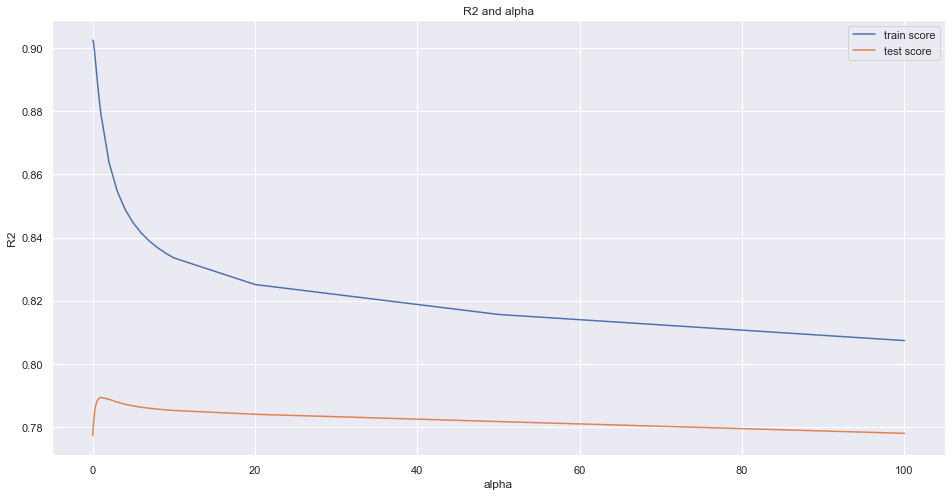

In [677]:
# plotting mean test and trains scores with alpha

plt.figure(figsize = (16,8))

plt.plot(cv_result_r['param_alpha'], cv_result_r['mean_train_score'])
plt.plot(cv_result_r['param_alpha'], cv_result_r['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('R2')
plt.title('R2 and alpha')
plt.legend(['train score', 'test score'], loc = 'upper right')
plt.show()

In [678]:
print(model_cv.best_params_)
print(model_cv.best_score_)

{'alpha': 1.0}
0.7892981418269679


In [679]:
model_cv.best_params_

{'alpha': 1.0}

In [686]:
ridge = Ridge(alpha = 1.0)
ridge.fit(x_train, y_train)

y_pred_train = ridge.predict(x_train)
print('train r2: ', r2_score(y_train, y_pred_train))

y_pred_test = ridge.predict(x_test)
print('test r2: ', r2_score(y_test, y_pred_test))

train r2:  0.8784936256234364
test r2:  0.8001645517702862


In [688]:
model_parameters = list(ridge.coef_)
model_parameters.insert(0, ridge.intercept_)

cols = x_train.columns

cols.insert(0, 'constant')

ridge_coef = pd.DataFrame(list(zip(cols, model_parameters)))
ridge_coef.columns = ['Feature', 'Coef']

In [689]:
ridge_coef.sort_values(by='Coef',ascending=False).head(10)

,Feature,Coef
0,OverallQual,11.205556
10,MSZoning_RH,0.368312
12,MSZoning_RM,0.344248
24,RoofMatl_Membran,0.284083
30,Exterior1st_AsphShn,0.262196
11,MSZoning_RL,0.244585
13,Neighborhood_BrDale,0.206072
46,Heating_GasW,0.195069
25,RoofMatl_Metal,0.189108
28,RoofMatl_WdShake,0.179387


# Lasso Regression

In [690]:
lm = Lasso(alpha = 0.001)

lm.fit(x_train, y_train)

y_train_pred = ridge.predict(x_train)
print(r2_score(y_train, y_train_pred))
y_test_pred = ridge.predict(x_test)
print(r2_score(y_test, y_test_pred))

0.8784936256234364
0.8001645517702862


In [691]:
model_parameter = list(lm.coef_)
model_parameter.insert(0, lm.intercept_)
model_parameter = [round(x,3) for x in model_parameter]

col = x_train.columns
col.insert(0, 'Constant')
list(zip(col, model_parameter))

[('OverallQual', 11.674),
 ('BsmtFinSF1', 0.17),
 ('BsmtFinSF2', 0.041),
 ('BsmtUnfSF', 0.005),
 ('TotalBsmtSF', -0.0),
 ('1stFlrSF', 0.038),
 ('2ndFlrSF', 0.011),
 ('LowQualFinSF', 0.0),
 ('GrLivArea', -0.012),
 ('MSZoning_FV', 0.137),
 ('MSZoning_RH', 0.154),
 ('MSZoning_RL', 0.0),
 ('MSZoning_RM', 0.142),
 ('Neighborhood_BrDale', -0.0),
 ('Neighborhood_Crawfor', -0.071),
 ('Condition1_PosA', 0.051),
 ('Condition2_PosN', 0.0),
 ('Condition2_RRAe', -0.752),
 ('BldgType_Duplex', -0.0),
 ('RoofStyle_Gable', -0.068),
 ('RoofStyle_Gambrel', 0.0),
 ('RoofStyle_Hip', -0.0),
 ('RoofStyle_Shed', -0.007),
 ('RoofMatl_CompShg', 0.0),
 ('RoofMatl_Membran', 0.0),
 ('RoofMatl_Metal', 0.0),
 ('RoofMatl_Roll', 0.0),
 ('RoofMatl_Tar&Grv', -0.0),
 ('RoofMatl_WdShake', -0.0),
 ('RoofMatl_WdShngl', -0.0),
 ('Exterior1st_AsphShn', 0.0),
 ('Exterior1st_BrkComm', -0.0),
 ('Exterior1st_CBlock', -0.0),
 ('Exterior1st_ImStucc', -0.0),
 ('Exterior2nd_AsphShn', 0.0),
 ('Exterior2nd_CBlock', -0.0),
 ('Exterior2n

# using grid search cv

In [692]:
folds = KFold(n_splits = 10, shuffle = True, random_state = 42)

hyper_param = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20.0, 50.0,
                                   100.0]}

model = Lasso()

model_cv = GridSearchCV(estimator = model,
                        param_grid = hyper_param,
                        scoring = 'r2',
                        cv = folds,
                        return_train_score = True,
                        verbose = 1)

model_cv.fit(x_train, y_train)

Fitting 10 folds for each of 26 candidates, totalling 260 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 260 out of 260 | elapsed:    3.5s finished


GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20.0,
                                   50.0, 100.0]},
             return_train_score=True, scoring='r2', verbose=1)

In [693]:
cv_result_l = pd.DataFrame(model_cv.cv_results_)
cv_result_l['param_alpha'] = cv_result_l['param_alpha'].astype('float32')
cv_result_l.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.041209,0.018500,0.002797,0.000594,0.0001,{'alpha': 0.0001},0.906961,0.896328,0.871904,0.602991,...,0.900377,0.902338,0.901202,0.897752,0.899385,0.906003,0.901538,0.903533,0.900879,0.002495
1,0.013729,0.002211,0.003000,0.000627,0.0010,{'alpha': 0.001},0.882865,0.856103,0.883932,0.649800,...,0.867351,0.875643,0.871292,0.864776,0.864207,0.874566,0.877543,0.868078,0.869756,0.004535
2,0.005903,0.001139,0.003300,0.000900,0.0100,{'alpha': 0.01},0.817428,0.779148,0.829008,0.689997,...,0.778523,0.795209,0.787262,0.777298,0.772228,0.787738,0.824074,0.779922,0.786680,0.013869
3,0.005900,0.000831,0.002601,0.000664,0.0500,{'alpha': 0.05},0.733544,0.710072,0.771801,0.668434,...,0.724670,0.742712,0.732949,0.723669,0.716702,0.730957,0.772349,0.727634,0.733284,0.014582
4,0.005100,0.001221,0.002600,0.000663,0.1000,{'alpha': 0.1},0.644330,0.637833,0.676933,0.625036,...,0.652565,0.670103,0.663240,0.653418,0.645202,0.660632,0.687806,0.657099,0.661200,0.010989


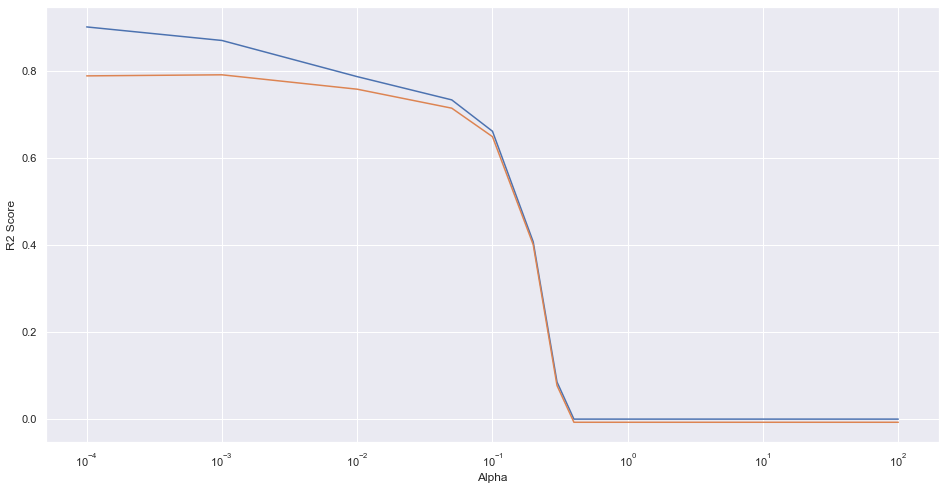

In [694]:
plt.figure(figsize=(16,8))
plt.plot(cv_result_l['param_alpha'],cv_result_l['mean_train_score'])
plt.plot(cv_result_l['param_alpha'],cv_result_l['mean_test_score'])
plt.xscale('log')
plt.ylabel('R2 Score')
plt.xlabel('Alpha')
plt.show()

In [695]:
model_cv.best_params_

{'alpha': 0.001}

In [697]:
lasso = Lasso(alpha = 0.001)
lasso.fit(x_train, y_train)

y_pred_train = lasso.predict(x_train)
print('train r2: ', r2_score(y_train, y_pred_train))

y_pred_test = lasso.predict(x_test)
print('test r2: ', r2_score(y_test, y_pred_test))

train r2:  0.8663072943057095
test r2:  0.748275574339103


In [698]:
model_parameters = list(lasso.coef_)
model_parameters.insert(0, lasso.intercept_)

cols = x_train.columns

cols.insert(0, 'constant')

lasso_coef = pd.DataFrame(list(zip(cols, model_parameters)))
lasso_coef.columns = ['Feature', 'Coef']

In [701]:
lasso_coef.sort_values(by='Coef',ascending=False).head(10)

,Feature,Coef
0,OverallQual,11.674370
1,BsmtFinSF1,0.169636
10,MSZoning_RH,0.154233
12,MSZoning_RM,0.142389
9,MSZoning_FV,0.137024
69,SaleCondition_Partial,0.098459
44,BsmtFinType1_No_Basement,0.079634
65,PoolQC_Gd,0.074715
53,GarageType_No_Garage,0.065309
46,Heating_GasW,0.058975


In [702]:
lasso_coef.shape

(70, 2)

Best alpha Value for Lasso: 0.001
Best alpha value for Ridge: 1.0

# Variables that best explain data set

    - OverallQual
    - BsmtFinSF1
    - MSZoning_RH
    - MSZoning_RM
    - MSZoning_FV
    - SaleCondition_Partial
    - BsmtFinType1_No_Basement	
    - PoolQC_Gd
    - GarageType_No_Garage
    - Heating_GasW

## Question 1

In [704]:
lasso = Lasso(alpha = 0.002)
lasso.fit(x_train, y_train)

y_pred_train = lasso.predict(x_train)
print('train r2: ', r2_score(y_train, y_pred_train))

y_pred_test = lasso.predict(x_test)
print('test r2: ', r2_score(y_test, y_pred_test))

model_parameters = list(lasso.coef_)
model_parameters.insert(0, lasso.intercept_)

cols = x_train.columns

cols.insert(0, 'constant')

lasso_coef = pd.DataFrame(list(zip(cols, model_parameters)))
lasso_coef.columns = ['Feature', 'Coef']

print(lasso_coef.sort_values(by='Coef',ascending=False).head(10))

lasso_coef.shape

train r2:  0.820154767812517
test r2:  0.8440154496909013
                     Feature       Coef
0                OverallQual  11.753928
1                 BsmtFinSF1   0.189718
12               MSZoning_RM   0.125935
9                MSZoning_FV   0.118542
10               MSZoning_RH   0.107426
65                 PoolQC_Gd   0.084740
69     SaleCondition_Partial   0.065810
44  BsmtFinType1_No_Basement   0.064900
53      GarageType_No_Garage   0.038820
60             GarageCond_Fa   0.034071


(70, 2)

In [706]:
ridge = Ridge(alpha = 2.0)
ridge.fit(x_train, y_train)

y_pred_train = ridge.predict(x_train)
print('train r2: ', r2_score(y_train, y_pred_train))

y_pred_test = ridge.predict(x_test)
print('test r2: ', r2_score(y_test, y_pred_test))


model_parameters = list(ridge.coef_)
model_parameters.insert(0, ridge.intercept_)

cols = x_train.columns

cols.insert(0, 'constant')

ridge_coef = pd.DataFrame(list(zip(cols, model_parameters)))
ridge_coef.columns = ['Feature', 'Coef']

ridge_coef.sort_values(by='Coef',ascending=False).head(10)

train r2:  0.8630065049357419
test r2:  0.8329158487186958


,Feature,Coef
0,OverallQual,11.345885
10,MSZoning_RH,0.283463
12,MSZoning_RM,0.266952
24,RoofMatl_Membran,0.223375
30,Exterior1st_AsphShn,0.185929
1,BsmtFinSF1,0.169895
11,MSZoning_RL,0.161281
46,Heating_GasW,0.157322
13,Neighborhood_BrDale,0.122229
28,RoofMatl_WdShake,0.110716


## Question 3

Top 5 features in lasso: 

OverallQual	
BsmtFinSF1	
MSZoning_RH	
MSZoning_RM	
MSZoning_FV

In [707]:
X_train_q3 = x_train.drop(['OverallQual', 'BsmtFinSF1', 'MSZoning_RH', 'MSZoning_RM', 'MSZoning_FV'], axis = 1)

X_test_q3 = x_test.drop(['OverallQual', 'BsmtFinSF1', 'MSZoning_RH', 'MSZoning_RM', 'MSZoning_FV'], axis = 1)


In [708]:
folds = KFold(n_splits = 10, shuffle = True, random_state = 42)

hyper_param = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20.0, 50.0,
                                   100.0]}

model = Lasso()

model_cv = GridSearchCV(estimator = model,
                        param_grid = hyper_param,
                        scoring = 'r2',
                        cv = folds,
                        return_train_score = True,
                        verbose = 1)

model_cv.fit(X_train_q3, y_train)

Fitting 10 folds for each of 26 candidates, totalling 260 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 260 out of 260 | elapsed:    3.6s finished


GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20.0,
                                   50.0, 100.0]},
             return_train_score=True, scoring='r2', verbose=1)

In [709]:
model_cv.best_params_

{'alpha': 0.001}

In [711]:
lasso = Lasso(alpha = 0.001)
lasso.fit(X_train_q3, y_train)

y_pred_train = lasso.predict(X_train_q3)
print('train r2: ', r2_score(y_train, y_pred_train))

y_pred_test = lasso.predict(X_test_q3)
print('test r2: ', r2_score(y_test, y_pred_test))

model_parameters = list(lasso.coef_)
model_parameters.insert(0, lasso.intercept_)

cols = X_train_q3.columns

cols.insert(0, 'constant')

lasso_coef = pd.DataFrame(list(zip(cols, model_parameters)))
lasso_coef.columns = ['Feature', 'Coef']

print(lasso_coef.sort_values(by='Coef',ascending=False).head(10))

lasso_coef.shape

train r2:  0.7978002273447642
test r2:  0.5580899240020563
                     Feature       Coef
0                 BsmtFinSF2  11.518893
7                MSZoning_RL   0.214450
64     SaleCondition_Partial   0.205319
48      GarageType_No_Garage   0.171090
60                 PoolQC_Gd   0.142791
39  BsmtFinType1_No_Basement   0.130485
3                   1stFlrSF   0.130199
41              Heating_GasW   0.102459
8        Neighborhood_BrDale   0.090459
10           Condition1_PosA   0.059807


(65, 2)